In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Terms by year

In [2]:
#
# Data loading
#
import pandas as pd

url = "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
df = pd.read_json(url + "cleaned-data.json", orient="records", lines=True)

In [3]:
import matplotlib.pyplot as plt

from techminer import DataFrame, Plot

df = DataFrame(df)

## Document type

In [ ]:
df.documents_by_term_per_year(column="Document Type")

In [ ]:
df.documents_by_term_per_year(column="Document Type", as_matrix=True)

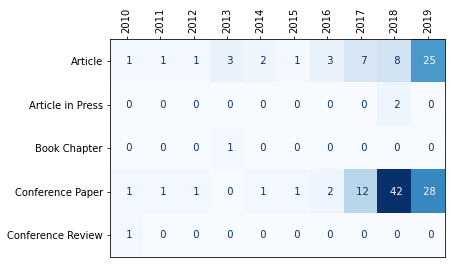

In [4]:
Plot(df.documents_by_term_per_year(column="Document Type", as_matrix=True)).heatmap(cmap='Blues')

## Source title

In [ ]:
df.documents_by_term_per_year(column="Source title").head(20)

In [ ]:
df.documents_by_term_per_year(column="Source title", minmax=(2, 4))

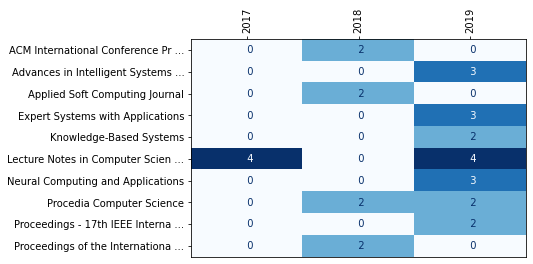

In [6]:
Plot(
    df.documents_by_term_per_year(column="Source title", as_matrix=True, minmax=(2, 4))
).heatmap(cmap='Blues')

In [8]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

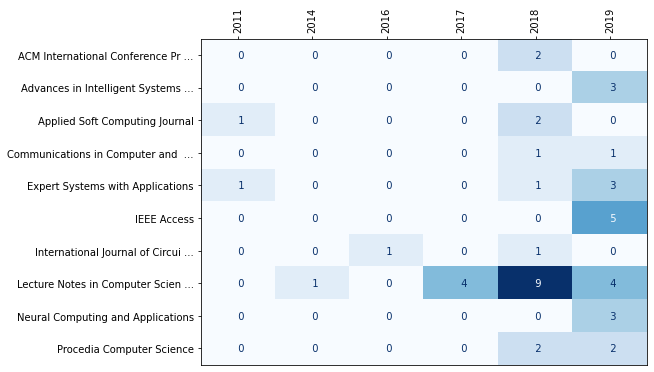

In [14]:
#
# Selects the top 10 journals by frequency
#
plt.figure(figsize=(8, 6))
Plot(
    DataFrame(df[df.top_10_Source_title_freq]).documents_by_term_per_year(
        column="Source title", as_matrix=True
    )
).heatmap(cmap="Blues")

In [ ]:
rdf.terms_by_year(column="Source title", sep=",", top_n=30).heatmap(figsize=(11, 6))

## Authors

In [ ]:
df.documents_by_term_per_year(column="Authors", sep=",").head(20)

In [ ]:
df.documents_by_term_per_year(column="Authors", sep=",", as_matrix=True)

In [ ]:
Plot(
    df.documents_by_term_per_year(
        column="Authors", sep=",", as_matrix=True, minmax=(2, 6)
    )
).heatmap()

In [ ]:
plt.figure(figsize=(11, 4))
Plot(
    df.documents_by_term_per_year(
        column="Authors", sep=",", as_matrix=True, minmax=(2, 3)
    )
).heatmap()

In [ ]:
plt.figure(figsize=(10, 5))
Plot(df.documents_by_term_per_year(column="Authors", sep=",", as_matrix=True)).heatmap()

## Keywords

In [ ]:
df.documents_by_term_per_year(column="keywords_cleaned", sep=";").head(20)

In [ ]:
df.documents_by_term_per_year(
    column="keywords_cleaned", sep=";", as_matrix=True, minmax=(10, 20)
)

In [ ]:
plt.figure(figsize=(7, 8))
df.terms_by_year(column="keywords (cleaned)", sep=";", as_matrix=True).heatmap()

In [ ]:
plt.figure(figsize=(7, 8))
Plot(
    df.documents_by_term_per_year(column="keywords", sep=";", as_matrix=True)
).heatmap()

In [ ]:
plt.figure(figsize=(7, 8))
Plot(df.terms_by_year(column="keywords", sep=";", as_matrix=True)).heatmap()